In [2]:
#Include the UNSflow libraries
#Pkg.clone("git://github.com/KiranUofG/UNSflow")
include("../src/UNSflow.jl")
using UNSflow

### This notebook is related to the topic of modelling separated flows by modifying formulas for forces and moments. 

### Static constants for CM are determined for differenent aerofoils.

#### Table of results

|SD7003 aerofoil|
|:--:|


| No | Source  |Re number| $k_0$| $k_1$ | $k_2$ | $m$|$par$|
|:--:|:-------:|:-------:|:----:|:----------------:|:--:|:--:|:--:|
| 1  | Xfoil  | 1M| -0.03  | -0.12 | 0.07 | 0.86 |0.9|
 |2  | Xfoil  | 1M| -0.07  | -0.011 |0.07 | 1.89 |1.0|
 
 |NACA 0012 aerofoil|
|:--:|


| No | Source  |Re number| $k_0$| $k_1$ | $k_2$ | $m$|$par$|
|:--:|:-------:|:-------:|:----:|:----------------:|:--:|:--:|:--:|
| 1  | Xfoil  | 1M| -0.01  | -0.04 | 0.06 | 0.84 |0.9|
 |2  | Xfoil  | 1M| 0.00  | -0.135 |0.04 | 2.0 |1.0|
 |3| Dymore's manual|  N/A| 0.00  | -0.135 |0.04 | 2.0 |N/A|
 |4| Exp. [1]|2,5M |0.01|-0.17|0.04|2.56|1.0|
 
  |NACA 0015 aerofoil|
|:--:|


| No | Source  |Re number| $k_0$| $k_1$ | $k_2$ | $m$|$par$|
|:--:|:-------:|:-------:|:----:|:----------------:|:--:|:--:|:--:|
| 1  | Xfoil  | 1M| -0.01  | -0.01 | 0.046 | 1.00 |0.9|
 |2  | Xfoil  | 1M| 0.00  | -0.135 |0.04 | 2.0 |1.0|

  
 [1]  McAlister, Kenneth W., Lawrence W. Carr, and William J. McCroskey. "Dynamic stall experiments on the NACA 0012 airfoil." (1978). https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19780009057.pdf

## SD7003

In [24]:
#Load data from Xfoil
xfoil = Xfoil("xfoil_sd7003_CN.txt");

#Calculate f basing on CN(alpha) data from Xfoil
f = fFromCN(xfoil.alpha, xfoil.CN);
#Obtain static constants
static_constants = cmstatic(xfoil.CM, xfoil.CN, f; par = 1.0)

4-element Array{Float64,1}:
 -0.0704412
 -0.011237 
  0.0739017
  1.88094  

## NACA0012

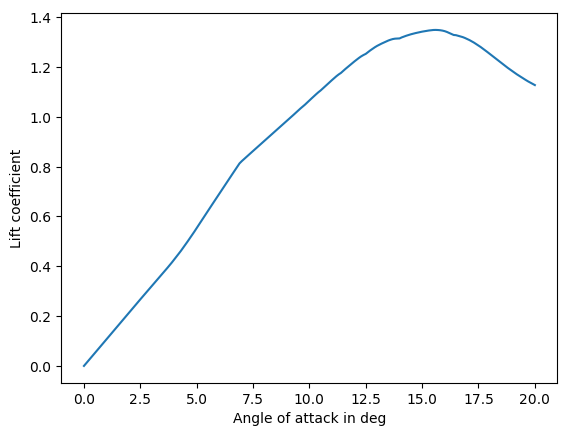

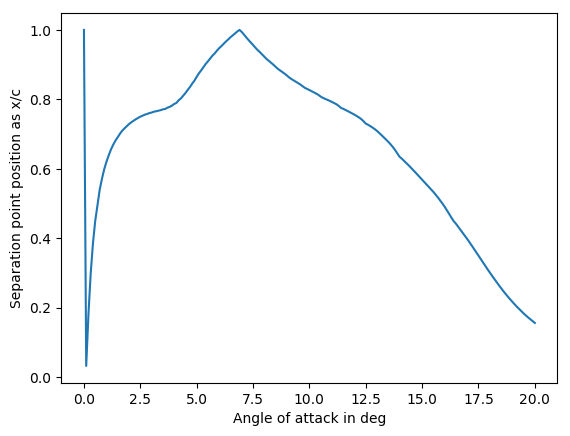

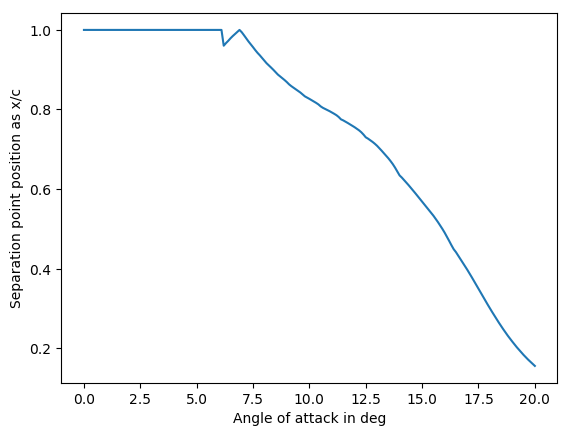

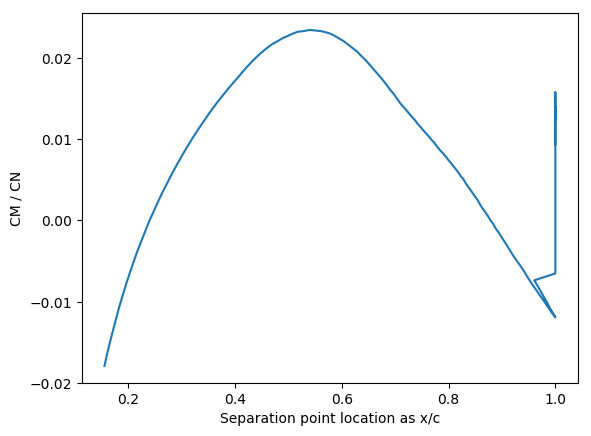

PyObject <matplotlib.text.Text object at 0x000000002ADEE2B0>

In [50]:
#Load data from Xfoil
xfoil = Xfoil("xfoil_0012_CN.txt");
xfoil.CN[1]=0.

plot(xfoil.alpha, xfoil.CN)
xlabel("Angle of attack in deg")
ylabel("Lift coefficient")

#lin parameter should be set as max. alpha for which CN is linear


#Calculate f basing on CN(alpha) data from Xfoil
f = fFromCN(xfoil.alpha, xfoil.CN, lin = 12.);
figure()
plot(xfoil.alpha, f)
xlabel("Angle of attack in deg")
ylabel("Separation point position as x/c")
#f characteristic needs to be modified
f[1:60]=1.

figure()
plot(xfoil.alpha, f)
xlabel("Angle of attack in deg")
ylabel("Separation point position as x/c")
#Obtain static constants

figure()
plot(f, xfoil.CM./xfoil.CN)
xlabel("Separation point location as x/c")
ylabel("CM / CN")
static_constants = cmstatic(xfoil.CM, xfoil.CN, f; par = 0.9)

### Notice that for par = 1.0 values are exactly the same as in Dymore's Manual!

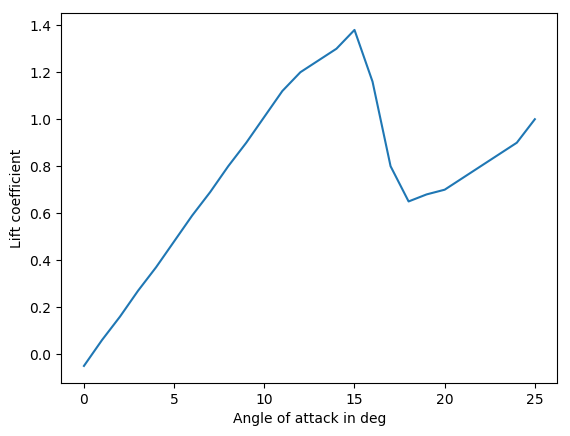

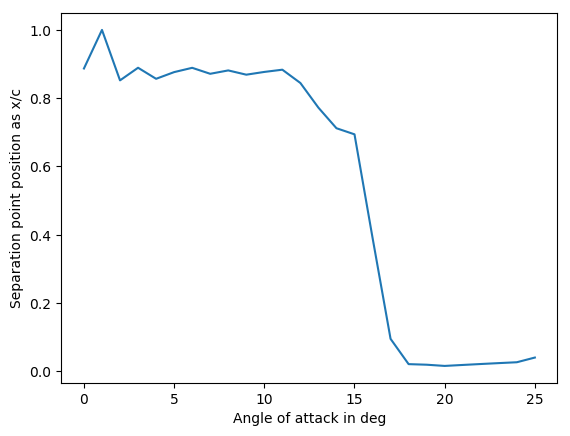

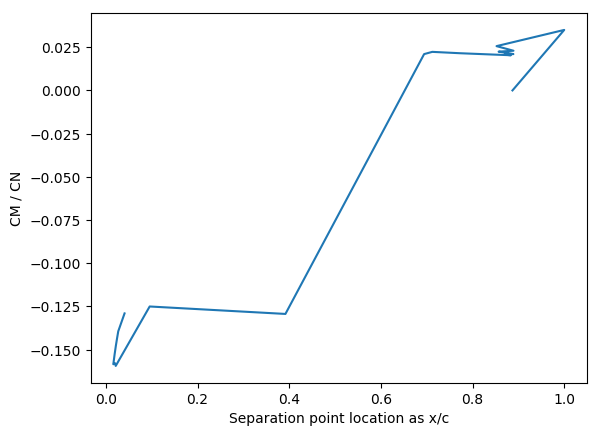

PyObject <matplotlib.text.Text object at 0x000000002A46DF98>

In [48]:
#load data from exp
data = readdlm("exp_0012_CN.txt", skipstart=1)
alpha = data[:,1]
CN = data[:,2]
CM = data[:,3]

plot(alpha, CN)
xlabel("Angle of attack in deg")
ylabel("Lift coefficient")

#lin parameter should be set as max. alpha for which CN is linear

f = fFromCN(alpha,CN,lin = 11.)

figure()
plot(alpha, f)
xlabel("Angle of attack in deg")
ylabel("Separation point position as x/c")

#Obtain static constants


figure()
plot(f, CM./CN)
xlabel("Separation point location as x/c")
ylabel("CM / CN")
static_constants = cmstatic(CM, CN, f; par = 0.9)

## NACA0015

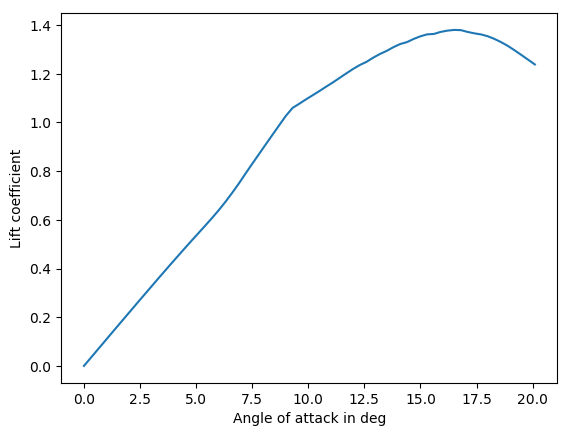

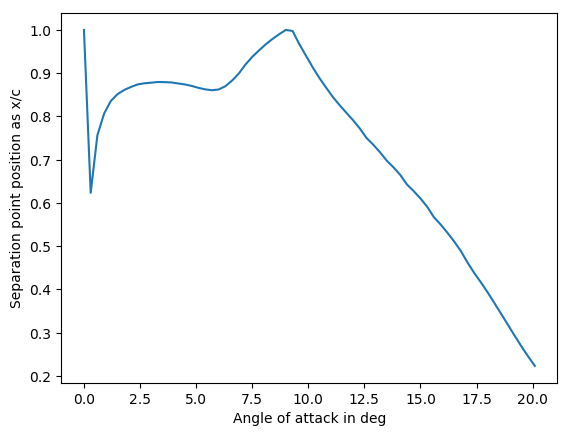

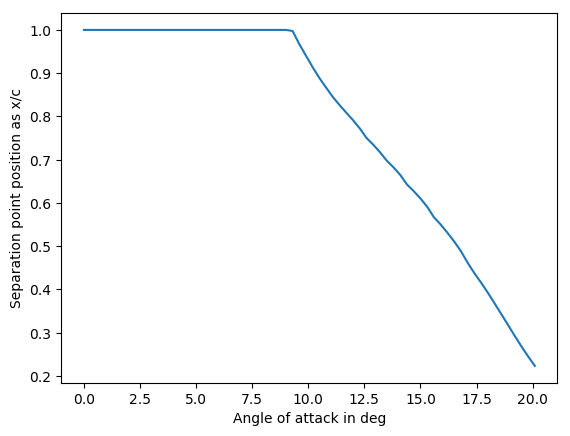

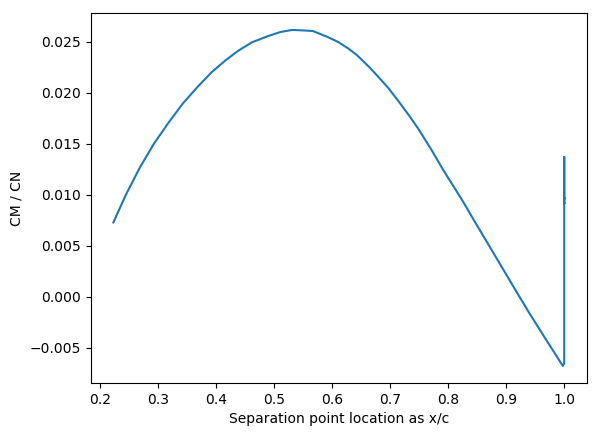

4-element Array{Float64,1}:
 -0.0105268
 -0.0117009
  0.0422558
  1.00322  

In [61]:
#Load data from Xfoil
xfoil = Xfoil("xfoil_0015_CN.txt");
xfoil.CN[1]=0.

plot(xfoil.alpha, xfoil.CN)
xlabel("Angle of attack in deg")
ylabel("Lift coefficient")

#lin parameter should be set as max. alpha for which CN is linear

#Calculate f basing on CN(alpha) data from Xfoil
f = fFromCN(xfoil.alpha, xfoil.CN, lin = 12.);
figure()
plot(xfoil.alpha, f)
xlabel("Angle of attack in deg")
ylabel("Separation point position as x/c")
f[1:30]=1.

figure()
plot(xfoil.alpha, f)
xlabel("Angle of attack in deg")
ylabel("Separation point position as x/c")
#Obtain static constants

figure()
plot(f, xfoil.CM./xfoil.CN)
xlabel("Separation point location as x/c")
ylabel("CM / CN")
static_constants = cmstatic(xfoil.CM, xfoil.CN, f; par = 0.9)